# Exercícios do CMS Open Data

Este jupyter notebook apresenta as soluções dos exercícios do CMS Open Data

## Inicializações necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep

# Jupyter Notebook uses "magic functions". With this function it is possible to plot
# the histogram straight to notebook.
%matplotlib inline

pd.set_option('display.max_columns', None)

dataset = pd.read_csv('DoubleMuRun2011A.csv')
print("The file has %d rows."% len(dataset))

The file has 475465 rows.


## Histograma para diferentes picos da massa invariante do muon

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


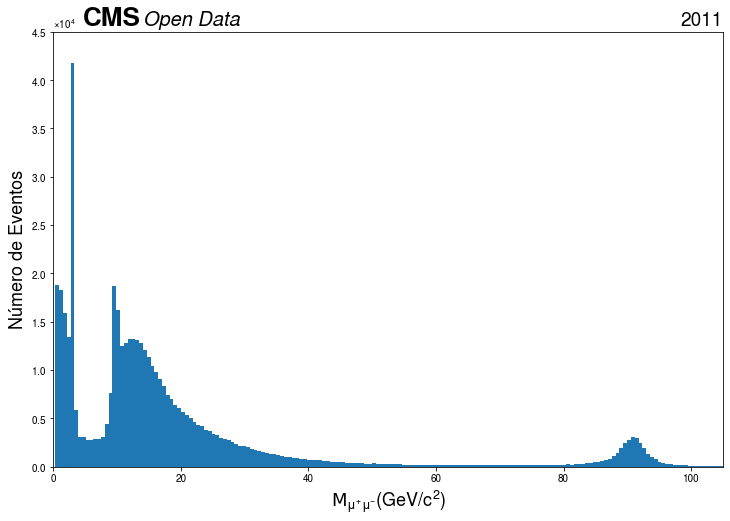

In [2]:
plt.figure( figsize = ( 12 , 8 ) )
plt.hist( dataset.M, bins = 500 )
plt.ylim(0,45000)
plt.xlim(0,105)
plt.ylabel('Número de Eventos',fontsize=18)
plt.xlabel(r'$\mathcal{M}_{\mu^{+}\mu^{-}}$(GeV/c$^{2}$)', fontsize=18)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,3), useMathText = True)
#plt.yscale('log')
hep.cms.label( llabel = "Open Data", rlabel = "2011", fontsize = 20)
plt.style.use(hep.style.ROOT)

## Influência da pseudorapidez na resolução da energia

Vamos comparar distribuições de massa invariante para valores grandes e pequenos de $\eta$. Abaixo, o código utilizado na aula é copiado para a presente análise com algumas adaptações. Vamos utilizá-lo para responder as perguntas, modificando as variáveis cond1 e cond2.

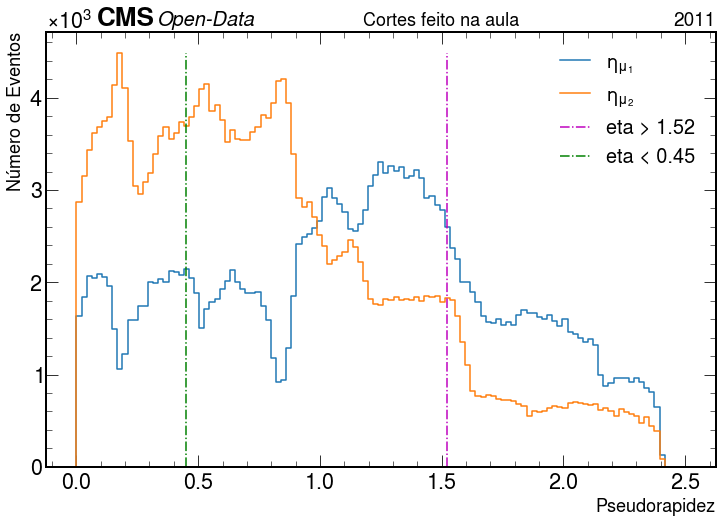

In [3]:
plt.figure( figsize = ( 12 , 8 ) )
range_ = np.linspace(0, 2.5, 120)
count1, bins1 = np.histogram( dataset.eta1, range_)
count2, bins2 = np.histogram( dataset.eta2, range_)
uppery2 = np.max(count2)
hep.histplot( count1, bins1, label = '$\eta_{\mu_{1}}$')
hep.histplot( count2, bins2, label = '$\eta_{\mu_{2}}$')
plt.plot([1.52,1.52],[0,uppery2],"-.m",label='eta > 1.52')
plt.plot([0.45,0.45],[0,uppery2],"-.g",label='eta < 0.45')
plt.legend(loc='best',fontsize=20)
plt.ylabel('Número de Eventos', fontsize=18)
plt.xlabel('Pseudorapidez',fontsize=18)
plt.title('                        Cortes feito na aula',fontsize=18)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,3), useMathText = True)
hep.cms.label( llabel = "Open-Data", rlabel = "2011", fontsize = 20)
plt.style.use(hep.style.ROOT)

## Limites escolhidos

In [4]:
cond1 = 1.21 # maior que
cond2 = 0.50 # menor que

## Histograma com os cortes propostos

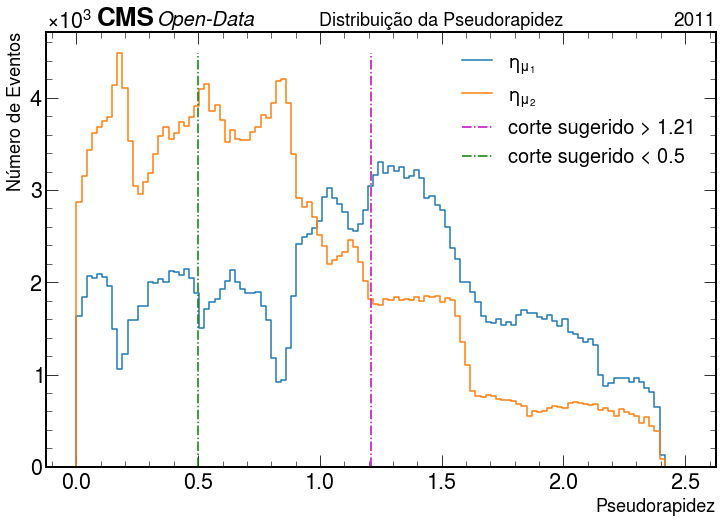

In [5]:
plt.figure( figsize = ( 12 , 8 ) )
count1, bins1 = np.histogram( dataset.eta1, range_)
count2, bins2 = np.histogram( dataset.eta2, range_)
uppery2 = np.max(count2)
hep.histplot( count1, bins1, label = '$\eta_{\mu_{1}}$')
hep.histplot( count2, bins2, label = '$\eta_{\mu_{2}}$')
plt.plot([cond1,cond1],[0,uppery2],"-.m",label='corte sugerido > {}'.format(cond1))
plt.plot([cond2,cond2],[0,uppery2],"-.g",label='corte sugerido < {}'.format(cond2))
plt.legend(loc='best',fontsize=20)
plt.ylabel('Número de Eventos', fontsize=18)
plt.xlabel('Pseudorapidez',fontsize=18)
plt.title('                        Distribuição da Pseudorapidez',fontsize=18)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,3), useMathText = True)
hep.cms.label( llabel = "Open-Data", rlabel = "2011", fontsize = 20)
plt.style.use(hep.style.ROOT)

Criamos um $\textit{dataset}$ que armazena as insformações dos cortes para altos e baixos valores da pseudorapidez 

In [6]:
large_etas = dataset[(np.absolute(dataset.eta1) > cond1) & (np.absolute(dataset.eta2) > cond1) & (dataset.M > 60) & (dataset.M < 120)]
small_etas = dataset[(np.absolute(dataset.eta1) < cond2) & (np.absolute(dataset.eta2) < cond2) & (dataset.M > 60) & (dataset.M < 120)]

# Escrevendo a quantidade de eventos que passam em cada corte de seleção:
print('Quantidade total de eventos = %d' % len(dataset))
print('Quantidade de eventos dentro do corte de seleção de altos valores de eta = %d' %len(large_etas))
print('Quantidade de eventos dentro do corte de seleção de baixos valores de eta  = %d' %len(small_etas))

Quantidade total de eventos = 475465
Quantidade de eventos dentro do corte de seleção de altos valores de eta = 5161
Quantidade de eventos dentro do corte de seleção de baixos valores de eta  = 2496


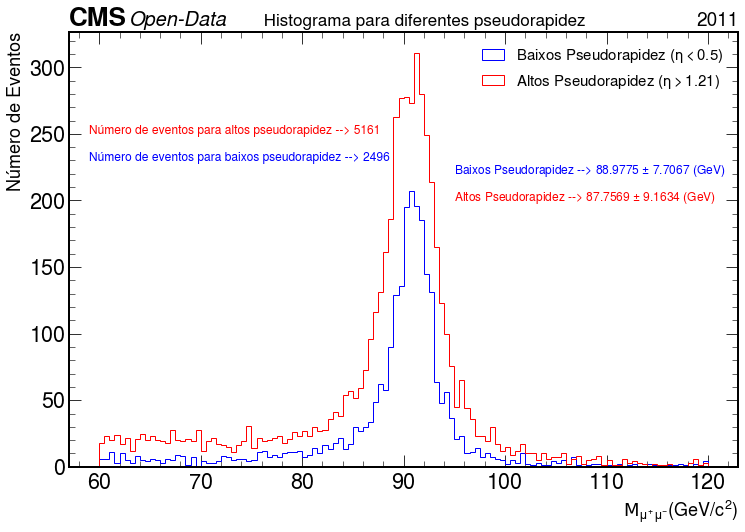

In [7]:
# Salvando as massas invariantes do "small_etas" numa variável "inv_mass2"
inv_mass2 = small_etas.M
inv_mass1 = large_etas.M
# Criar um histograma com a variável "inv_mass1"
plt.figure( figsize = ( 12 , 8 ) )
plt.hist(inv_mass2, histtype = 'step', bins=120, range=(60,120) , color = 'blue', label = 'Baixos Pseudorapidez ($\eta < ${})'.format(cond2))
plt.hist(inv_mass1, histtype = 'step', bins=120, range=(60,120) , color = 'red' , label = 'Altos Pseudorapidez ($\eta > ${})'.format(cond1))
plt.xlabel(r'$\mathcal{M}_{\mu^{+}\mu^{-}}$(GeV/c$^{2}$)', fontsize=18)
plt.ylabel('Número de Eventos', fontsize=18)
plt.legend(loc='best',fontsize=15)
plt.title('         Histograma para diferentes pseudorapidez',fontsize=17)
hep.cms.label( llabel = "Open-Data", rlabel = "2011", fontsize = 20)
plt.text(59,230,'Número de eventos para baixos pseudorapidez --> {}'.format(len(small_etas)),color='blue',fontsize=12)
plt.text(59,250,'Número de eventos para altos pseudorapidez --> {}'.format(len(large_etas)),color='red',fontsize=12)
plt.text(95,200,'Altos Pseudorapidez --> {:2.4f} $\pm$ {:2.4f} (GeV)'.format(inv_mass1.mean(),inv_mass1.std()),color='red',fontsize=12)
plt.text(95,220,'Baixos Pseudorapidez --> {:2.4f} $\pm$ {:2.4f} (GeV)'.format(inv_mass2.mean(),inv_mass2.std()),color='blue',fontsize=12)
plt.style.use(hep.style.ROOT)

In [8]:
# Calculando a média e o desvio padrão dos "large_etas"
print('Estimativa padrão para a massa invariante com ALTOS valores de Pseudorapidez')
print(inv_mass1.mean(), "+-" ,inv_mass1.std(),'(GeV)','\n')
print('Estimativa padrão para a massa invariante com BAIXOS valores de Pseudorapidez')
print(inv_mass2.mean(), "+-" ,inv_mass2.std(),"(GeV)")

Estimativa padrão para a massa invariante com ALTOS valores de Pseudorapidez
87.7568957760124 +- 9.163449069933499 (GeV) 

Estimativa padrão para a massa invariante com BAIXOS valores de Pseudorapidez
88.97751069711539 +- 7.706668684776035 (GeV)


__Questão 1)__ De que forma você pode ver o efeito da pseudo-rapidez na resolução de medição do detector CMS?

A partir da seleção das condições dadas na categoria (cond1 = 1,52 e cond2 = 0,45), pode-se observar que para eventos onde os valores baixos de ambos os múons são muito baixos, o desvio padrão da massa permanece inalterado Menos de dois múons têm valor mais alto. Substituindo esses valores pelo código acima, obtemos o valor de fechamento do número de eventos para 2 eventos (2.037 eventos altos e 2.017 eventos baixos), enquanto o desvio padrão dos eventos de múon altos (~ 8,9 GeV) é maior do que baixo 𝜂 (~ 7,6 GeV) desses. Como o número de eventos é semelhante, essa diferença no desvio padrão deve-se apenas à diferença na resolução (alta ou pior resolução).

__Questão 2)__ Seus resultados mostram o mesmo que a teoria prevê?

Espera-se que o múon detectado na região anterior do detector (maior valor detectado para pseudorapidez) seja pior do que o múon central reconstruído no barril (menor valor para pseudorapidez). Isso se deve à estrutura do detector nessas diferentes regiões. Diferente. Embora a parte central do detector seja mais uniforme e "equipada" para melhor reconstruir múons, irregularidades começam a aparecer na parte externa, como a sobreposição da parte "barril" e da parte "estendida" e mais " A "zona morta" afeta a resolução da energia das partículas que passam por ela.

Depois de responder às perguntas, você pode tentar alterar as condições para as grandes e pequenas pseudo-rapidez na primeira célula de código. As condições são nomeadas _cond1_ e _cond2_. Certifique-se de escolher as condições de forma que haja quase a mesma quantidade de eventos em ambos os grupos.

__Question 3)__ Após as alterações, execute o código novamente. Como as mudanças afetam o número de eventos? E como os histogramas?

Redefinindo os cortes em $ \eta $, agora, vamos escolher eventos em que ambos os múons tenham $ | \eta |> 1,17 $ (cond1 = 1,17, large_etas) ou ambos os múons tenham $ | \eta | <0,75 $ (cond2 = 0,75, small_etas) . Obtemos os seguintes resultados:

large_etas: 

    Número de eventos: 5661

    Média: 87.82
    
    Desvio Padrão: 9.14
    
small_etas:
    
    Número de eventos: 5686
    
    Média: 88.96
    
    Desvio Padrão: 7.69
    
Portanto, apesar da janela maior em | 𝜂 |, agora selecionamos mais eventos em ambos os casos (~ 5600 em cada caso). (Small_etas varia de 0 a 0,75, e large_etas começa em 1,17.) Quando o múon é reconstruído para um valor alto de alto (9,14 GeV), o desvio padrão da massa invariante é maior do que o valor baixo. 𝜂 (7,69 GeV), o que confirma o que mostramos antes.

## Distribuição de Breit-Wigner

__Questão 4)__ Escreva uma função que represente a distribuição de Breit-Wigner para os valores do histograma.

Para obter informações sobre a massa e o tempo de vida da ressonância detectada, uma função que descreve a distribuição das massas invariantes deve ser ajustada aos valores do histograma. No nosso caso, os valores seguem uma distribuição Breit-Wigner:

$$
N(E) = \frac{K}{(E-M)^2 + \frac{\Gamma^2}{4}},
$$

onde $ E $ é a energia, $ M $ o máximo da distribuição (igual à massa da partícula que é detectada na ressonância), $ \Gamma $ a largura total na metade do máximo (FWHM) ou a largura de decaimento de a distribuição e $ K $ uma constante.

A distribuição Breit-Wigner também pode ser expressa da seguinte forma:

$$
\frac{ \frac{2\sqrt{2}M\Gamma\sqrt{M^2(M^2+\Gamma^2)} }{\pi\sqrt{M^2+\sqrt{M^2(M^2+\Gamma^2)}}} }{(E^2-M^2)^2 + M^2\Gamma^2},
$$

onde a constante $ K $ é escrita aberta.

A largura de decaimento $ \Gamma $ e o tempo de vida $ \ tau $ da partícula detectada na ressonância estão relacionados da seguinte maneira:

$$
\Gamma \equiv \frac{\hbar}{\tau},
$$

onde $ \hbar $ é a constante de Planck reduzida.

Vamos importar o ROOT para utilizar suas ferramentas. Declaramos o histograma InvMassHist, que conterá os valores de massa invariante do par de múons no intervalo de 60 a 120 GeV. Com base na fórmula acima e na documentação https://twiki.cern.ch/twiki/bin/view/CMSPublic/WorkBookHowToFit#Fitting_a_Breit_Wigner, definimos a função breit_wigner. 

In [9]:
import zfit

In [10]:
xmin , xmax = 60,120

In [11]:
obs = zfit.Space("x", limits=(xmin, xmax) )
massa = zfit.Parameter("massa", 90, 80 , 110)
gamma = zfit.Parameter("gamma", 0.2, 0.001 , 10)

In [12]:
breit_wigner = zfit.pdf.Cauchy(m = massa, gamma = gamma, obs = obs)

In [13]:
color = 'black' # cor para fazer os plots
n_bins = 200

linewidth = 2.5 
plot_scaling = np.array( inv_mass2 ).size / n_bins * obs.area() # fator de correção das pdf's

x = np.linspace(xmin, xmax, np.array( inv_mass2 ).size)
data = zfit.Data.from_numpy( obs = obs, array = np.array( inv_mass2 ) ) # colocar os dados em formato zfit

<ipython-input-13-c283704032ea>:5: UserWarning: The function <function Space.area at 0x7f417fa431f0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[60.]]), array([[120.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  plot_scaling = np.array( inv_mass2 ).size / n_bins * obs.area() # fator de correção das pdf's


In [14]:
nll_breit_wigner = zfit.loss.UnbinnedNLL( model = breit_wigner, data = data )

In [15]:
minimizer = zfit.minimize.Minuit()

In [16]:
nll_breit_wigner = zfit.loss.UnbinnedNLL( model = breit_wigner, data = data )

In [17]:
result_breit_wigner = minimizer.minimize( nll_breit_wigner )
param_errors_breit_wigner, _ = result_breit_wigner.errors()

------------------------------------------------------------------
| FCN = 7644                    |      Ncalls=65 (65 total)      |
| EDM = 6.29e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/home/matheus/miniconda3/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:358: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn("'minuit_minos' will be changed as the default errors method to a custom implementation"


In [18]:
result_breit_wigner

FitResult of
<UnbinnedNLL model=[<zfit.Cauchy  params=[gamma, massa] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7f415c426fd0>] constraints=[]> 
with
<Minuit strategy=PushbackStrategy tolerance=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 6.3e-07 │ 7644        │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value         minuit_minos    at limit
------  -------  -------------------  ----------
gamma      2.08  -  0.062   +  0.064       False
massa     90.76  -  0.056   +  0.056       False

In [19]:
param_errors_breit_wigner

OrderedDict([(<zfit.Parameter 'gamma' floating=True value=2.08>,
              ------------------------------------
|          |         gamma         |
------------------------------------
|  Error   |   -0.06   |   0.06    |
|  Valid   |   True    |   True    |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   False   |
------------------------------------),
             (<zfit.Parameter 'massa' floating=True value=90.76>,
              ------------------------------------
|          |         massa         |
------------------------------------
|  Error   |   -0.06   |   0.06    |
|  Valid   |   True    |   True    |
| At Limit |   False   |   False   |
| Max FCN  |   False   |   False   |
| New Min  |   False   |   False   |
------------------------------------)])

In [20]:
massa.set_value(90.76)
gamma.set_value(2.08)

(60.0, 120.0)

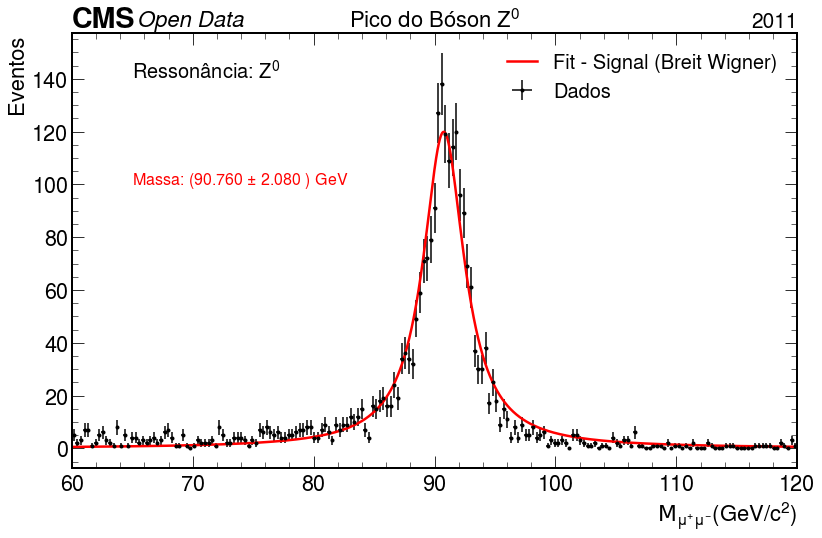

In [21]:
plt.figure(figsize = ( 13, 8 ))

counts_1, bin_edges_1 = np.histogram( np.array( inv_mass2 ) , bins=np.linspace(xmin,xmax,n_bins) )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar(bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,fmt='.', label = 'Dados', color = 'black')

plt.text(65,140, r"Ressonância: $Z^{0}$", color = 'black', fontsize = 20)
plt.text(65,100, "Massa: ({:2.3f} $\pm$ {:2.3f} ) GeV".format(90.76 , 2.08 ), color = 'red', fontsize = 16)

# plot the pdfs
y_breit_wigner = ( breit_wigner.pdf(x) ).numpy()  

plt.plot(x, y_breit_wigner*plot_scaling , '-', label="Fit - Signal (Breit Wigner)", linewidth=linewidth, color = 'red')

hep.cms.label( llabel="Open Data" , rlabel="2011" , fontsize = 22 )

plt.xlabel(r"$\mathcal{M}_{\mu^{+}\mu^{-}}(GeV/c^{2})$", fontsize = 22 )
plt.ylabel( 'Eventos' , fontsize = 22 )
plt.title( r'Pico do Bóson $Z^{0}$' , fontsize = 22 )
plt.legend(loc='best',fontsize = 20 )
plt.style.use(hep.style.ROOT)
plt.xlim(xmin,xmax)

__Questão 5)__ Calcule o tempo de vida $ \tau $ do bóson Z com a incerteza usando o ajuste. Compare o valor calculado com a vida útil conhecida do Z. O que você observa? O que poderia explicar suas observações?

Para isso, vamos ajustar a função de Breit-Wigner à distribuição de massa invariante utilizando o ROOT.

In [22]:
xmax = np.array( inv_mass2 ).mean()
ymax = y_breit_wigner.max()*plot_scaling.numpy()
half_ymax = ymax/2
half_xmax = bin_edges_1.mean()
width = abs( 2*(xmax-half_xmax) )

In [23]:
width

2.0449786057692165

In [24]:
hbar = 6.582119E-25
lifetime = hbar / width 
print('A vida média do bóson Z, em segundos, é de: ', lifetime,'s')

A vida média do bóson Z, em segundos, é de:  3.218673770684336e-25 s


Este valor é da mesma ordem de grandeza da vida média estimada para o Bóson $Z^0$, o que é uma boa aproximação para esta análise. Talvez o valor se aproxime mais do valor padrão $\tau=3\times10^{-25}$s se impusermos cortes nos valores de $\eta$ dos múons utilizados na reconstrução.